In [1]:
import random
import numpy as np
from simple_grad.engine import Value
from simple_grad.network import Layer, Network
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)
random.seed(42)


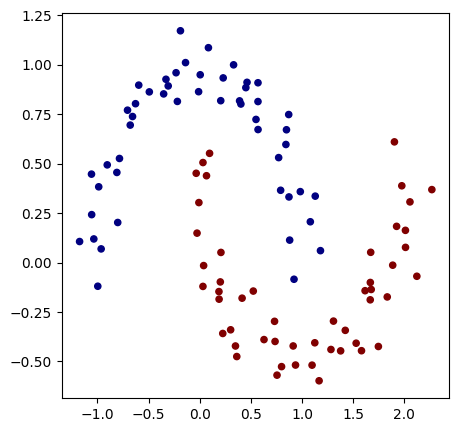

In [3]:
from sklearn.datasets import make_moons, make_blobs
x, y = make_moons(n_samples=100, noise=0.1)

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,1], c=y, s=20, cmap='jet')


In [4]:
model = Network()
model.add_layer(2,16,'relu')
model.add_layer(16,1,'sigmoid')

In [5]:
def loss(batch_size=None):
    if batch_size is None:
        xb, yb = x, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        xb, yb = x[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in xb]

    scores = list(map(model, inputs))
    
    acc = 0
    for yi, scorei in zip(yb, scores):
        acc += (1 + -yi*scorei[0]).relu()
    # svm "max-margin" loss
    data_loss = acc * (1.0 / len(yb))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum([p*p for p in model.parameters()])
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei[0].data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)





Value(data=0.6365180356320137, gradient=0) 0.5


In [10]:
# optimization
for k in range(100):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    total_loss.backprop(learning_rate)
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

c:\Users\dariu\OneDrive\Desktop\AI\Projects\Neural Network from Scratch\simple_grad\engine.py:29: RuntimeWarning: overflow encountered in double_scalars
  self.gradient += out.gradient * other.data
c:\Users\dariu\OneDrive\Desktop\AI\Projects\Neural Network from Scratch\simple_grad\engine.py:29: RuntimeWarning: invalid value encountered in double_scalars
  self.gradient += out.gradient * other.data


step 0 loss 0.6365180356320137, accuracy 50.0%
step 1 loss nan, accuracy 50.0%
step 2 loss nan, accuracy 50.0%
step 3 loss nan, accuracy 50.0%
step 4 loss nan, accuracy 50.0%
step 5 loss nan, accuracy 50.0%
step 6 loss nan, accuracy 50.0%
step 7 loss nan, accuracy 50.0%
step 8 loss nan, accuracy 50.0%
step 9 loss nan, accuracy 50.0%
step 10 loss nan, accuracy 50.0%
step 11 loss nan, accuracy 50.0%
step 12 loss nan, accuracy 50.0%
step 13 loss nan, accuracy 50.0%
step 14 loss nan, accuracy 50.0%
step 15 loss nan, accuracy 50.0%
step 16 loss nan, accuracy 50.0%
step 17 loss nan, accuracy 50.0%
step 18 loss nan, accuracy 50.0%
step 19 loss nan, accuracy 50.0%
step 20 loss nan, accuracy 50.0%
step 21 loss nan, accuracy 50.0%
step 22 loss nan, accuracy 50.0%
step 23 loss nan, accuracy 50.0%
step 24 loss nan, accuracy 50.0%
step 25 loss nan, accuracy 50.0%
step 26 loss nan, accuracy 50.0%
step 27 loss nan, accuracy 50.0%
step 28 loss nan, accuracy 50.0%
step 29 loss nan, accuracy 50.0%
step 

KeyboardInterrupt: 

(-1.5978882018302847, 2.1521117981697153)

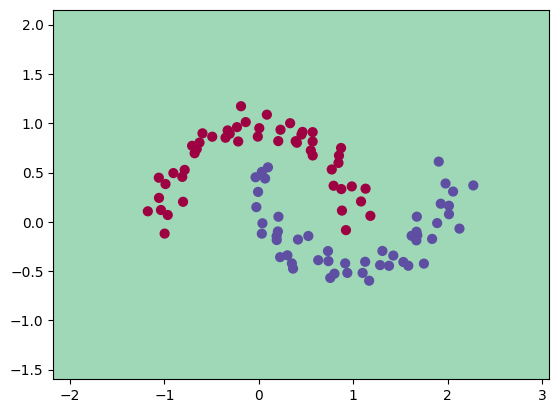

In [31]:
h = 0.25
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s[0].data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [13]:
maxi=-10999
mini=109999
for p in model.parameters():
    maxi = p.data if p.data>maxi else maxi
    mini = p.data if p.data<mini else mini
print(maxi, mini)



-0.14827265888634186 -9236.770599527992


In [12]:
maxi=-10999
mini=109999
for p in model.parameters():
    maxi = p.gradient if p.gradient>maxi else maxi
    mini = p.gradient if p.gradient<mini else mini
print(maxi, mini)

0 0


In [10]:
model.zero_grad()

TypeError: 'method' object is not iterable